# New Section

In [5]:
!pip install autoviz
!pip install pandas_profiling
!pip install datatile

!pip install scikit-learn

In [6]:
%%capture
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set_theme(style="darkgrid")

from sklearn import metrics
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import make_pipeline


ImportError: cannot import name 'DecisionBoundaryDisplay' from 'sklearn.inspection' (/usr/local/Caskroom/miniconda/base/envs/env/lib/python3.7/site-packages/sklearn/inspection/__init__.py)

In [22]:
df = pd.read_csv(r'/Attachment.csv')

# **Dataset Columns:**
1. Loan ID: Unique identifier for each loan application.
2. Gender: Gender of the loan applicant (e.g., Male, Female).
3. Married: Marital status of the loan applicant (e.g., Yes, No).
4. Dependents: Number of dependents of the loan applicant.
5. Education: Educational background of the loan applicant (e.g., Graduate, Not Graduate).
6. Self_Employed: Indicates whether the loan applicant is self-employed (e.g., Yes, No).
7. Applicantincome: Income of the loan applicant.
8. CoapplicantIncome: Income of the co-applicant (if applicable).
9. LoanAmount: Amount of the loan applied for.
10. Loan_Amount _Term: Term of the loan in months.
11. Credit_ History: Credit history of the loan applicant (e.g., 1.0, 0.0), where 1.0 indicates a good credit
history and 0.0 indicates a poor credit history.
12. Property_Area: Area where the property associated with the loan is located (e.g., Urban,
Semiurban, Rural).
13. Loan _Status: The target variable indicating whether the loan was approved or not (e.g., Y for Yes, N
for No).

In [23]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [25]:
df1 = df
#df1 = df.drop('Loan_ID',axis=1)
df1['Total_Income'] = df1['CoapplicantIncome'] + df1['ApplicantIncome']
numeric_features = [col for col in df1.columns if df1[col].dtype in ['int64', 'float64']]
object_features = [col for col in df1.columns if df1[col].dtype in ['object', 'category']]

In [26]:
#nan_columns = df1.columns[df1.isnull().any()]
#df1.info()
df1.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [27]:
zero_columns = df1.columns[df1.eq(0).any()]
zero_columns

Index(['CoapplicantIncome', 'Credit_History'], dtype='object')

In [28]:
#df1[zero_columns] = df1[zero_columns].replace(0,np.NaN)
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


# **Tasks to Perform:**
- Data Cleaning and Preprocessing: Clean the dataset by handling missing values, duplicate records,
and outliers.
- Impute missing data using appropriate **techniques** and decide on strategies for dealing
with outliers.
- Exploratory Data Analysis (EDA): Perform exploratory data analysis to gain insights into the data.
Calculate summary statistics, visualize distributions, and create plots to understand the
relationships between different variables. Identify patterns and trends that could influence loan
approval.

- Feature Engineering: Create new features if necessary to capture valuable information from the
existing columns. For example, you could calculate the total income by summing up the applicant
and co-applicant incomes

- Data Transformation: Encode categorical variables using techniques like one-hot encoding or label
encoding. Standardize or normalize numerical features if required for certain machine learning
algorithms.
Correlation Analysis: Analyze the correlation between various features and the target variable
(Loan_Status). Identify features that have a significant impact on loan approval.

In [29]:
print(f'Numeric features: {numeric_features} \nNumber of numeric features: {len(numeric_features)}\n')
for x in numeric_features:
  b = df1[x].isnull().sum()
  c = df1[x].nunique()
  d = df1[x].mode().values
  e = df1[x].mean().round(2)
  f = df1[x].median().round(2)
  print(f"{x}, and have {b} null values, unique values is: {c}, most common value is: {d[0]}, average is: {e}, median is: {f}")

Numeric features: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Total_Income'] 
Number of numeric features: 6

ApplicantIncome, and have 0 null values, unique values is: 505, most common value is: 2500, average is: 5403.46, median is: 3812.5
CoapplicantIncome, and have 0 null values, unique values is: 287, most common value is: 0.0, average is: 1621.25, median is: 1188.5
LoanAmount, and have 22 null values, unique values is: 203, most common value is: 120.0, average is: 146.41, median is: 128.0
Loan_Amount_Term, and have 14 null values, unique values is: 10, most common value is: 360.0, average is: 342.0, median is: 360.0
Credit_History, and have 50 null values, unique values is: 2, most common value is: 1.0, average is: 0.84, median is: 1.0
Total_Income, and have 0 null values, unique values is: 554, most common value is: 6000.0, average is: 7024.71, median is: 5416.5


In [30]:
print(f'Columns count: {df1.columns.size}')
# print(f"Columns has null values count: {len(nan_columns)}")
print(f"Columns has numeric values count: {len(numeric_features)}")
print(f"Columns has object values count: {len(object_features)}")

Columns count: 14
Columns has numeric values count: 6
Columns has object values count: 8


In [31]:
print(f'Object features: {object_features} \n\nNumber of object features: {len(object_features)}')
print(f'shape: {df1.shape}')
for a in object_features:
  if a != 'Loan_ID':
    b = df1[a].isnull().sum()
    c = df1[a].nunique()
    d = df1[a].mode().values
    print(f"{a}, and have {b} null values, unique values is: {c}, most common value is: {d[0]}")

Object features: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'] 

Number of object features: 8
shape: (614, 14)
Gender, and have 13 null values, unique values is: 2, most common value is: Male
Married, and have 3 null values, unique values is: 2, most common value is: Yes
Dependents, and have 15 null values, unique values is: 4, most common value is: 0
Education, and have 0 null values, unique values is: 2, most common value is: Graduate
Self_Employed, and have 32 null values, unique values is: 2, most common value is: No
Property_Area, and have 0 null values, unique values is: 3, most common value is: Semiurban
Loan_Status, and have 0 null values, unique values is: 2, most common value is: Y


In [32]:
df1.duplicated().sum()

0

In [33]:
# df1['CoapplicantIncome'] = df1['CoapplicantIncome'].replace(np.NaN,0)
df1['LoanAmount'] = df1['LoanAmount'].fillna(df1['LoanAmount'].mode()[0])
print('------------------\n',df1.shape)
print('------------------\n')
df1.info()

------------------
 (614, 14)
------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Total_Income       614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


In [34]:
from datatile.summary.df import DataFrameSummary
dfs = DataFrameSummary(df1)
dfs.columns_stats

/usr/local/lib/python3.10/dist-packages/datatile/summary/df.py:39: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  self.corr = df.corr()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
counts,614,601,611,599,614,582,614,614,614,600,564,614,614,614
uniques,614,2,2,4,2,2,505,287,203,10,2,3,2,554
missing,0,13,3,15,0,32,0,0,0,14,50,0,0,0
missing_perc,0%,2.12%,0.49%,2.44%,0%,5.21%,0%,0%,0%,2.28%,8.14%,0%,0%,0%
types,unique,bool,bool,categorical,bool,bool,numeric,numeric,numeric,numeric,bool,categorical,bool,numeric


In [35]:
f"{round(df['Loan_Status'].value_counts()[1] / df['Credit_History'].value_counts()[1] *100,2)}%"

'40.42%'

# **Questions:**

- Data Overview and Summary:
How many loan applications are included in the dataset?
What is the overall approval rate for loan applications in the dataset?
------------------------------------------------

---


- What is the distribution of loan applicants based on gender and marital status?
------------------------------------------------

---


- Income and Loan Amount:
What is the range of applicant income and coapplicant income?
How does the distribution of applicant income differ based on gender and education?

------------------------------------------------
---


- Is there a correlation between applicant income and the requested loan amount?
------------------------------------------------

---


- Loan Approval and Credit History:
How does credit history relate to loan approval rates?
What percentage of loan applicants with good credit history (Credit_History = 1) were
approved for loans?
------------------------------------------------

---


- Are there any notable differences in loan approval rates between urban, semiurban, and
rural property areas?
------------------------------------------------

---


- Dependents and Education:
How does the number of dependents impact loan approval rates?
------------------------------------------------

---


- Does educational background (Education) play a role in loan approval?
------------------------------------------------


---


- Loan Term and Amount:
Is a there a connection between the loan term (Loan_Amount_Term) and the loan approval
outcome?
------------------------------------------------


---


- How does the requested loan amount (LoanAmount) vary across different property areas?
------------------------------------------------


---


Remember that the quality of your data preparation and analysis directly impacts the performance of the
subsequent loan classification model. Your efforts in cleaning, transforming, and exploring the data will
contribute to the overall success of the project by providing a solid foundation for building a robust
predictive model for loan approval.

---
Number of loans has approved is: 419 from 610


---



In [36]:
df['Loan_Status'].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64



---
Some plots Explain the relations between
- gender and Loan Approval
- Marital Status Loan Approval
- Education and Loan Approval


---



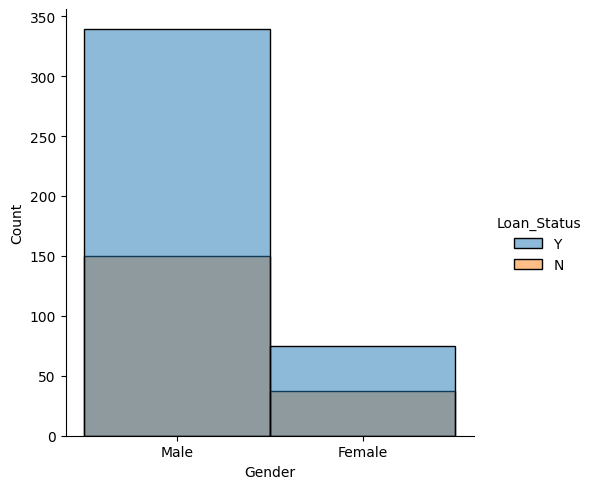

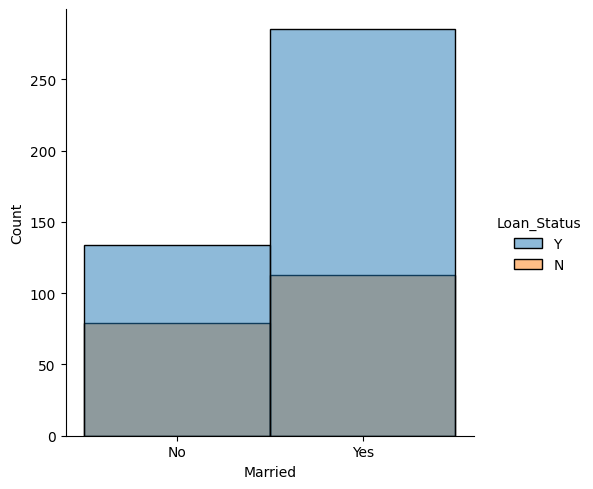

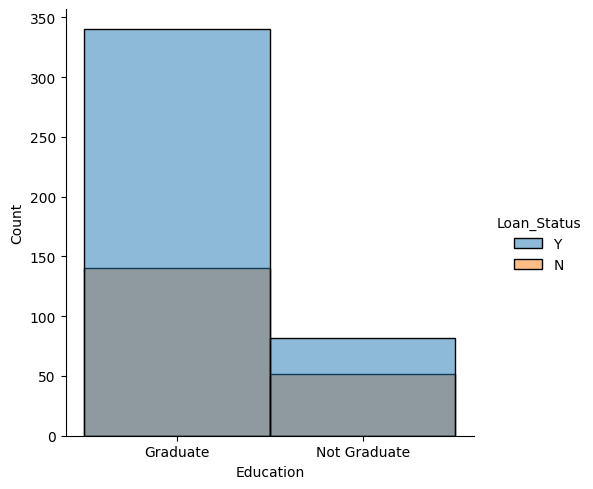

In [37]:
sns.displot(df1, x="Gender", hue='Loan_Status')
sns.displot(df1, x="Married", hue='Loan_Status')
sns.displot(df1, x="Education", hue='Loan_Status')

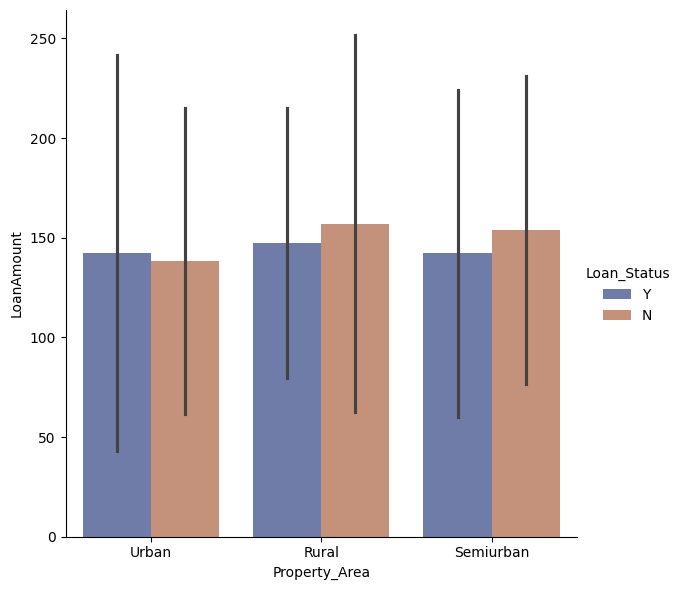

In [38]:
sns.catplot(df1, x='Property_Area', y='LoanAmount', kind="bar",hue='Loan_Status', errorbar="sd", palette="dark", alpha=.6, height=6)

<Axes: xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

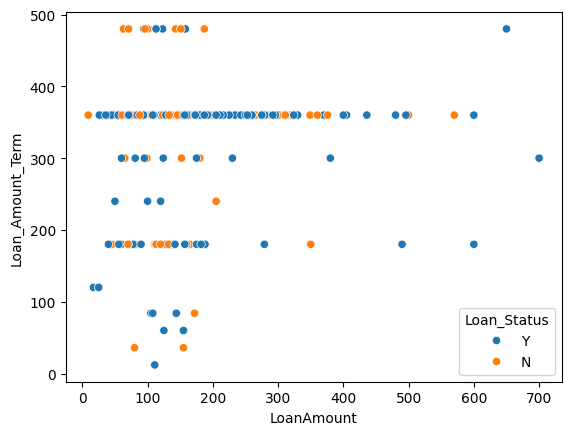

In [39]:
sns.scatterplot(df1, x='LoanAmount', y='Loan_Amount_Term',hue='Loan_Status')

In [40]:
df1.shape

(614, 14)

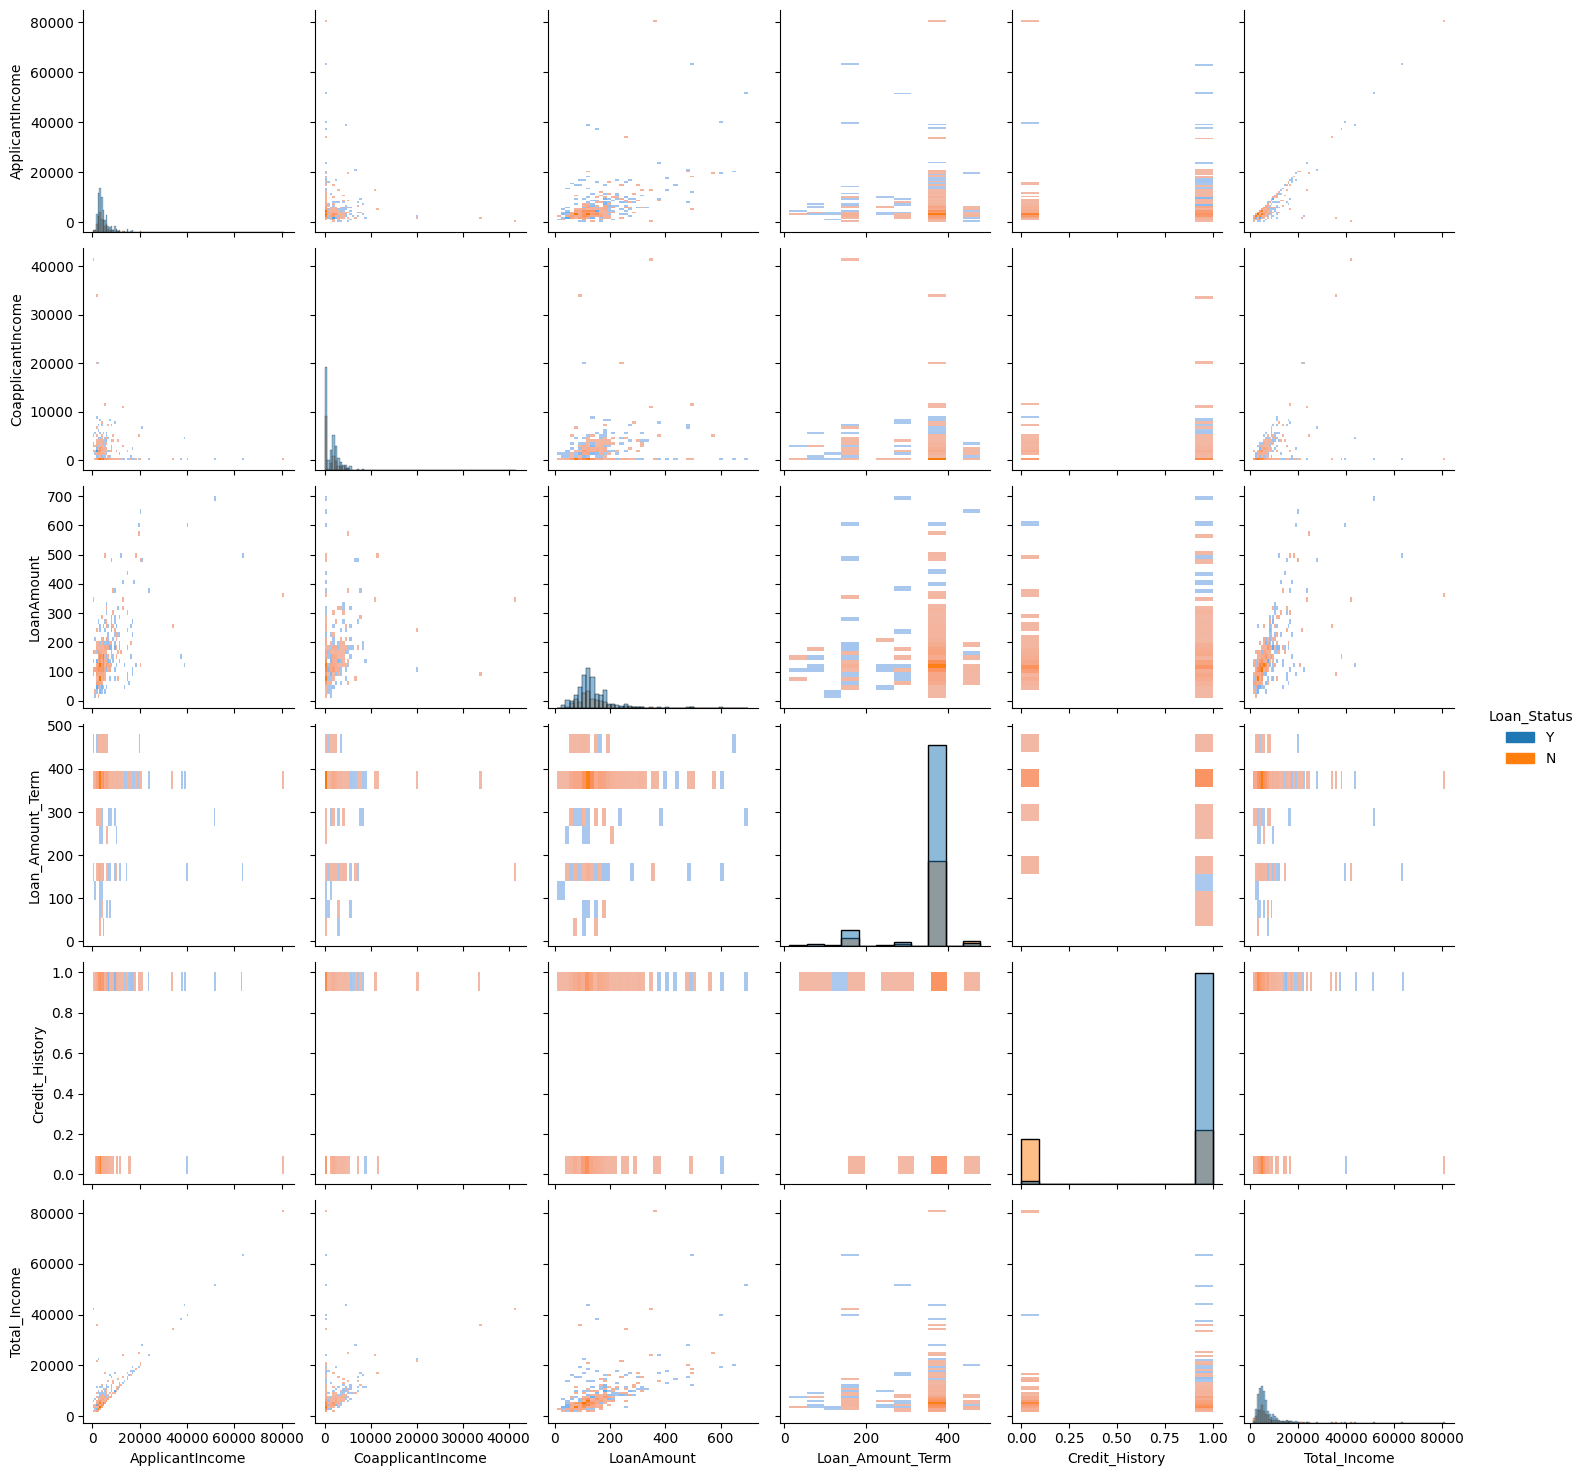

In [41]:
sns.pairplot(df1,hue="Loan_Status",kind='hist')

In [42]:
# Impute missing data using appropriate techniques and decide on strategies for dealing
# with missing data.
# Impute missing values for numeric columns using the median.
for col in numeric_features:
  if df1[col].isnull().any():
    df1[col] = df1[col].fillna(df1[col].mean())

# Impute missing values for object columns using the most frequent value.
for col in object_features:
  if df1[col].isnull().any():
    df1[col] = df1[col].fillna(df1[col].mode()[0])

# Check for remaining missing values.
df1.shape

(614, 14)

In [43]:
df1['Dependent'] = ['No' if x == '0' else 'Yes' for x in df1['Dependents']]
# df1['Graduated'] = ['Yes' if x=='Graduate' else 'No' for x in df1['Education']]
# df1['Married'] = [1 if x=='Yes' else 0 for x in df1['Married']]
# df1['Self_Employed'] = [1 if x=='Yes' else 0 for x in df1['Self_Employed']]
df1['Loan_Status'] = [1 if x=='Y' else 0 for x in df1['Loan_Status']]

#df2=df1
#df2.tail(5)

- gender 2 is male and 1 female
- married 1 is yes and 0 is no
- dependents 3 values, 2 encoders, 1 = 1, 2 = 2, 3 = 3+
- self_Employed 1 is yes 0 is no
- credit_history has 2 values 1.0 and 0.0
- property_Area 3 areas, 2 encoders, Urban,Rural,Semiurban
- Loan_Status
- Dependent 1 is yes 0 is no
- Greaduated 1 is yes 0 is no


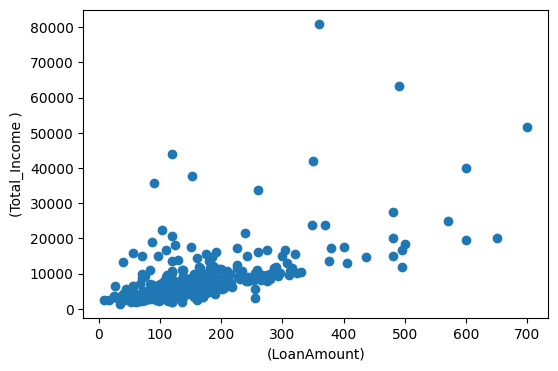

In [44]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x=df1['LoanAmount'], y=df1['Total_Income'])
ax.set_xlabel('(LoanAmount)')
ax.set_ylabel('(Total_Income )')
plt.show()

In [45]:
outlier_indices = np.where((df1['LoanAmount'] > 600) | (df1['Total_Income'] > 50000))
print(df1.shape)
df1 = df1.drop(outlier_indices[0])
outlier_indices[0]

(614, 15)


array([130, 171, 333, 409])

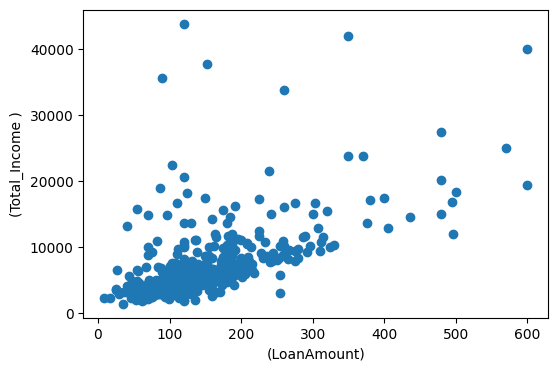

In [46]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x=df1['LoanAmount'], y=df1['Total_Income'])
ax.set_xlabel('(LoanAmount)')
ax.set_ylabel('(Total_Income )')
plt.show()

In [47]:
# # Retrieving data
numeric_features = [col for col in df1.columns if df1[col].dtype in ['int64', 'float64']]
category_features = [col for col in df1.columns if df1[col].dtype in ['object', 'category'] and col != 'Loan_ID']
# # Converting type of columns to category
for a in category_features:
  if a != 'Loan_ID':
    df1[a] = df1[a].astype('category')
# df1['Married'] = df1['Married'].astype('category')
# df1['Dependents'] = df1['Dependents'].astype('category')
# df1['Self_Employed'] = df1['Self_Employed'].astype('category')
# df1['Dependent'] = df1['Dependent'].astype('category')
# #
# df1['Property_Area'] = df1['Property_Area'].astype('category')

# df1['Loan_Status'] = df1['Loan_Status'].astype('category')
# df1['Education'] = df1['Education'].astype('category')

# ## Assigning numerical values and storing it in another columns
# # df2['Gender'] = df2['Gender'].cat.codes
# # df2['Married'] = df2['Married'].cat.codes
# # df2['Dependents'] = df2['Dependents'].cat.codes
# # df2['Self_Employed'] = df2['Self_Employed'].cat.codes
# # df2['Dependent'] = df2['Dependent'].cat.codes
# # df2['Graduated'] = df2['Graduated'].cat.codes

# New_df = df2


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            610 non-null    object  
 1   Gender             610 non-null    category
 2   Married            610 non-null    category
 3   Dependents         610 non-null    category
 4   Education          610 non-null    category
 5   Self_Employed      610 non-null    category
 6   ApplicantIncome    610 non-null    int64   
 7   CoapplicantIncome  610 non-null    float64 
 8   LoanAmount         610 non-null    float64 
 9   Loan_Amount_Term   610 non-null    float64 
 10  Credit_History     610 non-null    float64 
 11  Property_Area      610 non-null    category
 12  Loan_Status        610 non-null    int64   
 13  Total_Income       610 non-null    float64 
 14  Dependent          610 non-null    category
dtypes: category(7), float64(5), int64(2), object(1)
memory us

In [49]:
df_cat = df1[category_features]
df_num = df1[numeric_features]
df_num.info()
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 0 to 613
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    610 non-null    int64  
 1   CoapplicantIncome  610 non-null    float64
 2   LoanAmount         610 non-null    float64
 3   Loan_Amount_Term   610 non-null    float64
 4   Credit_History     610 non-null    float64
 5   Loan_Status        610 non-null    int64  
 6   Total_Income       610 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 38.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 0 to 613
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Gender         610 non-null    category
 1   Married        610 non-null    category
 2   Dependents     610 non-null    category
 3   Education      610 non-null    category
 4   Self_Employed  610 non-null    cat

In [50]:

encoder = OneHotEncoder(sparse_output=False, handle_unknown='error')
encoder.fit(df1[category_features])
X_encoded = encoder.transform(df1[category_features])
# create the names for the one-hot encoded categorical features
categorical_columns = [f'{col}_{cat}' for i, col in enumerate(df1[category_features].columns) for cat in encoder.categories_[i]]
# put the features into a dataframe and join with the original
# numerical features
one_hot_features = pd.DataFrame(X_encoded, columns=categorical_columns)
one_hot_features.info()
X_list = [one_hot_features,df_num, df1['Loan_ID']]
#X = one_hot_features.join(df_num)#
coded_df = pd.concat(X_list, axis=1,join='inner')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Female            610 non-null    float64
 1   Gender_Male              610 non-null    float64
 2   Married_No               610 non-null    float64
 3   Married_Yes              610 non-null    float64
 4   Dependents_0             610 non-null    float64
 5   Dependents_1             610 non-null    float64
 6   Dependents_2             610 non-null    float64
 7   Dependents_3+            610 non-null    float64
 8   Education_Graduate       610 non-null    float64
 9   Education_Not Graduate   610 non-null    float64
 10  Self_Employed_No         610 non-null    float64
 11  Self_Employed_Yes        610 non-null    float64
 12  Property_Area_Rural      610 non-null    float64
 13  Property_Area_Semiurban  610 non-null    float64
 14  Property_Area_Urban      6

In [51]:
coded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 0 to 609
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Female            606 non-null    float64
 1   Gender_Male              606 non-null    float64
 2   Married_No               606 non-null    float64
 3   Married_Yes              606 non-null    float64
 4   Dependents_0             606 non-null    float64
 5   Dependents_1             606 non-null    float64
 6   Dependents_2             606 non-null    float64
 7   Dependents_3+            606 non-null    float64
 8   Education_Graduate       606 non-null    float64
 9   Education_Not Graduate   606 non-null    float64
 10  Self_Employed_No         606 non-null    float64
 11  Self_Employed_Yes        606 non-null    float64
 12  Property_Area_Rural      606 non-null    float64
 13  Property_Area_Semiurban  606 non-null    float64
 14  Property_Area_Urban      6

In [52]:
X = coded_df.drop('Loan_ID',axis=1)
y = X['Loan_Status']
X= X.drop('Loan_Status',axis=1)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.30)

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 0 to 609
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Female            606 non-null    float64
 1   Gender_Male              606 non-null    float64
 2   Married_No               606 non-null    float64
 3   Married_Yes              606 non-null    float64
 4   Dependents_0             606 non-null    float64
 5   Dependents_1             606 non-null    float64
 6   Dependents_2             606 non-null    float64
 7   Dependents_3+            606 non-null    float64
 8   Education_Graduate       606 non-null    float64
 9   Education_Not Graduate   606 non-null    float64
 10  Self_Employed_No         606 non-null    float64
 11  Self_Employed_Yes        606 non-null    float64
 12  Property_Area_Rural      606 non-null    float64
 13  Property_Area_Semiurban  606 non-null    float64
 14  Property_Area_Urban      6

In [55]:
y.info()
print('----------\n')
X_train.info()


<class 'pandas.core.series.Series'>
Int64Index: 606 entries, 0 to 609
Series name: Loan_Status
Non-Null Count  Dtype
--------------  -----
606 non-null    int64
dtypes: int64(1)
memory usage: 9.5 KB
----------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 96 to 438
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Female            424 non-null    float64
 1   Gender_Male              424 non-null    float64
 2   Married_No               424 non-null    float64
 3   Married_Yes              424 non-null    float64
 4   Dependents_0             424 non-null    float64
 5   Dependents_1             424 non-null    float64
 6   Dependents_2             424 non-null    float64
 7   Dependents_3+            424 non-null    float64
 8   Education_Graduate       424 non-null    float64
 9   Education_Not Graduate   424 non-null    float64
 10  Self_Employed_No         424 n

In [56]:
X.isnull().sum()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 435 to 49
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Female            182 non-null    float64
 1   Gender_Male              182 non-null    float64
 2   Married_No               182 non-null    float64
 3   Married_Yes              182 non-null    float64
 4   Dependents_0             182 non-null    float64
 5   Dependents_1             182 non-null    float64
 6   Dependents_2             182 non-null    float64
 7   Dependents_3+            182 non-null    float64
 8   Education_Graduate       182 non-null    float64
 9   Education_Not Graduate   182 non-null    float64
 10  Self_Employed_No         182 non-null    float64
 11  Self_Employed_Yes        182 non-null    float64
 12  Property_Area_Rural      182 non-null    float64
 13  Property_Area_Semiurban  182 non-null    float64
 14  Property_Area_Urban      

In [57]:
# Build the model
svm = SVC(gamma='auto',kernel='sigmoid',cache_size=1024)
# Trained the model
svm.fit(X_train, y_train)

SVC(cache_size=1024, gamma='auto', kernel='sigmoid')

In [58]:
yhat = svm.predict(X_test)
from sklearn.metrics import mean_absolute_error
print("Accuracy:",accuracy_score(y_test,yhat))
print("Confusion matrix, in training\n")
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

Accuracy: 0.6758241758241759
Confusion matrix, in training

MAE: 0.324


In [59]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtree=DecisionTreeClassifier(max_features='log2',criterion="entropy",max_leaf_nodes=9)
dtree.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       max_leaf_nodes=9)

In [60]:
y_pred = dtree.predict(X_test)
# Measuring the accuracy of our model
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion matrix, in training\n")
# Confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.6593406593406593
Confusion matrix, in training

[[  5  54]
 [  8 115]]


In [61]:
X.columns

Index(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Dependent_No', 'Dependent_Yes',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Total_Income'],
      dtype='object')

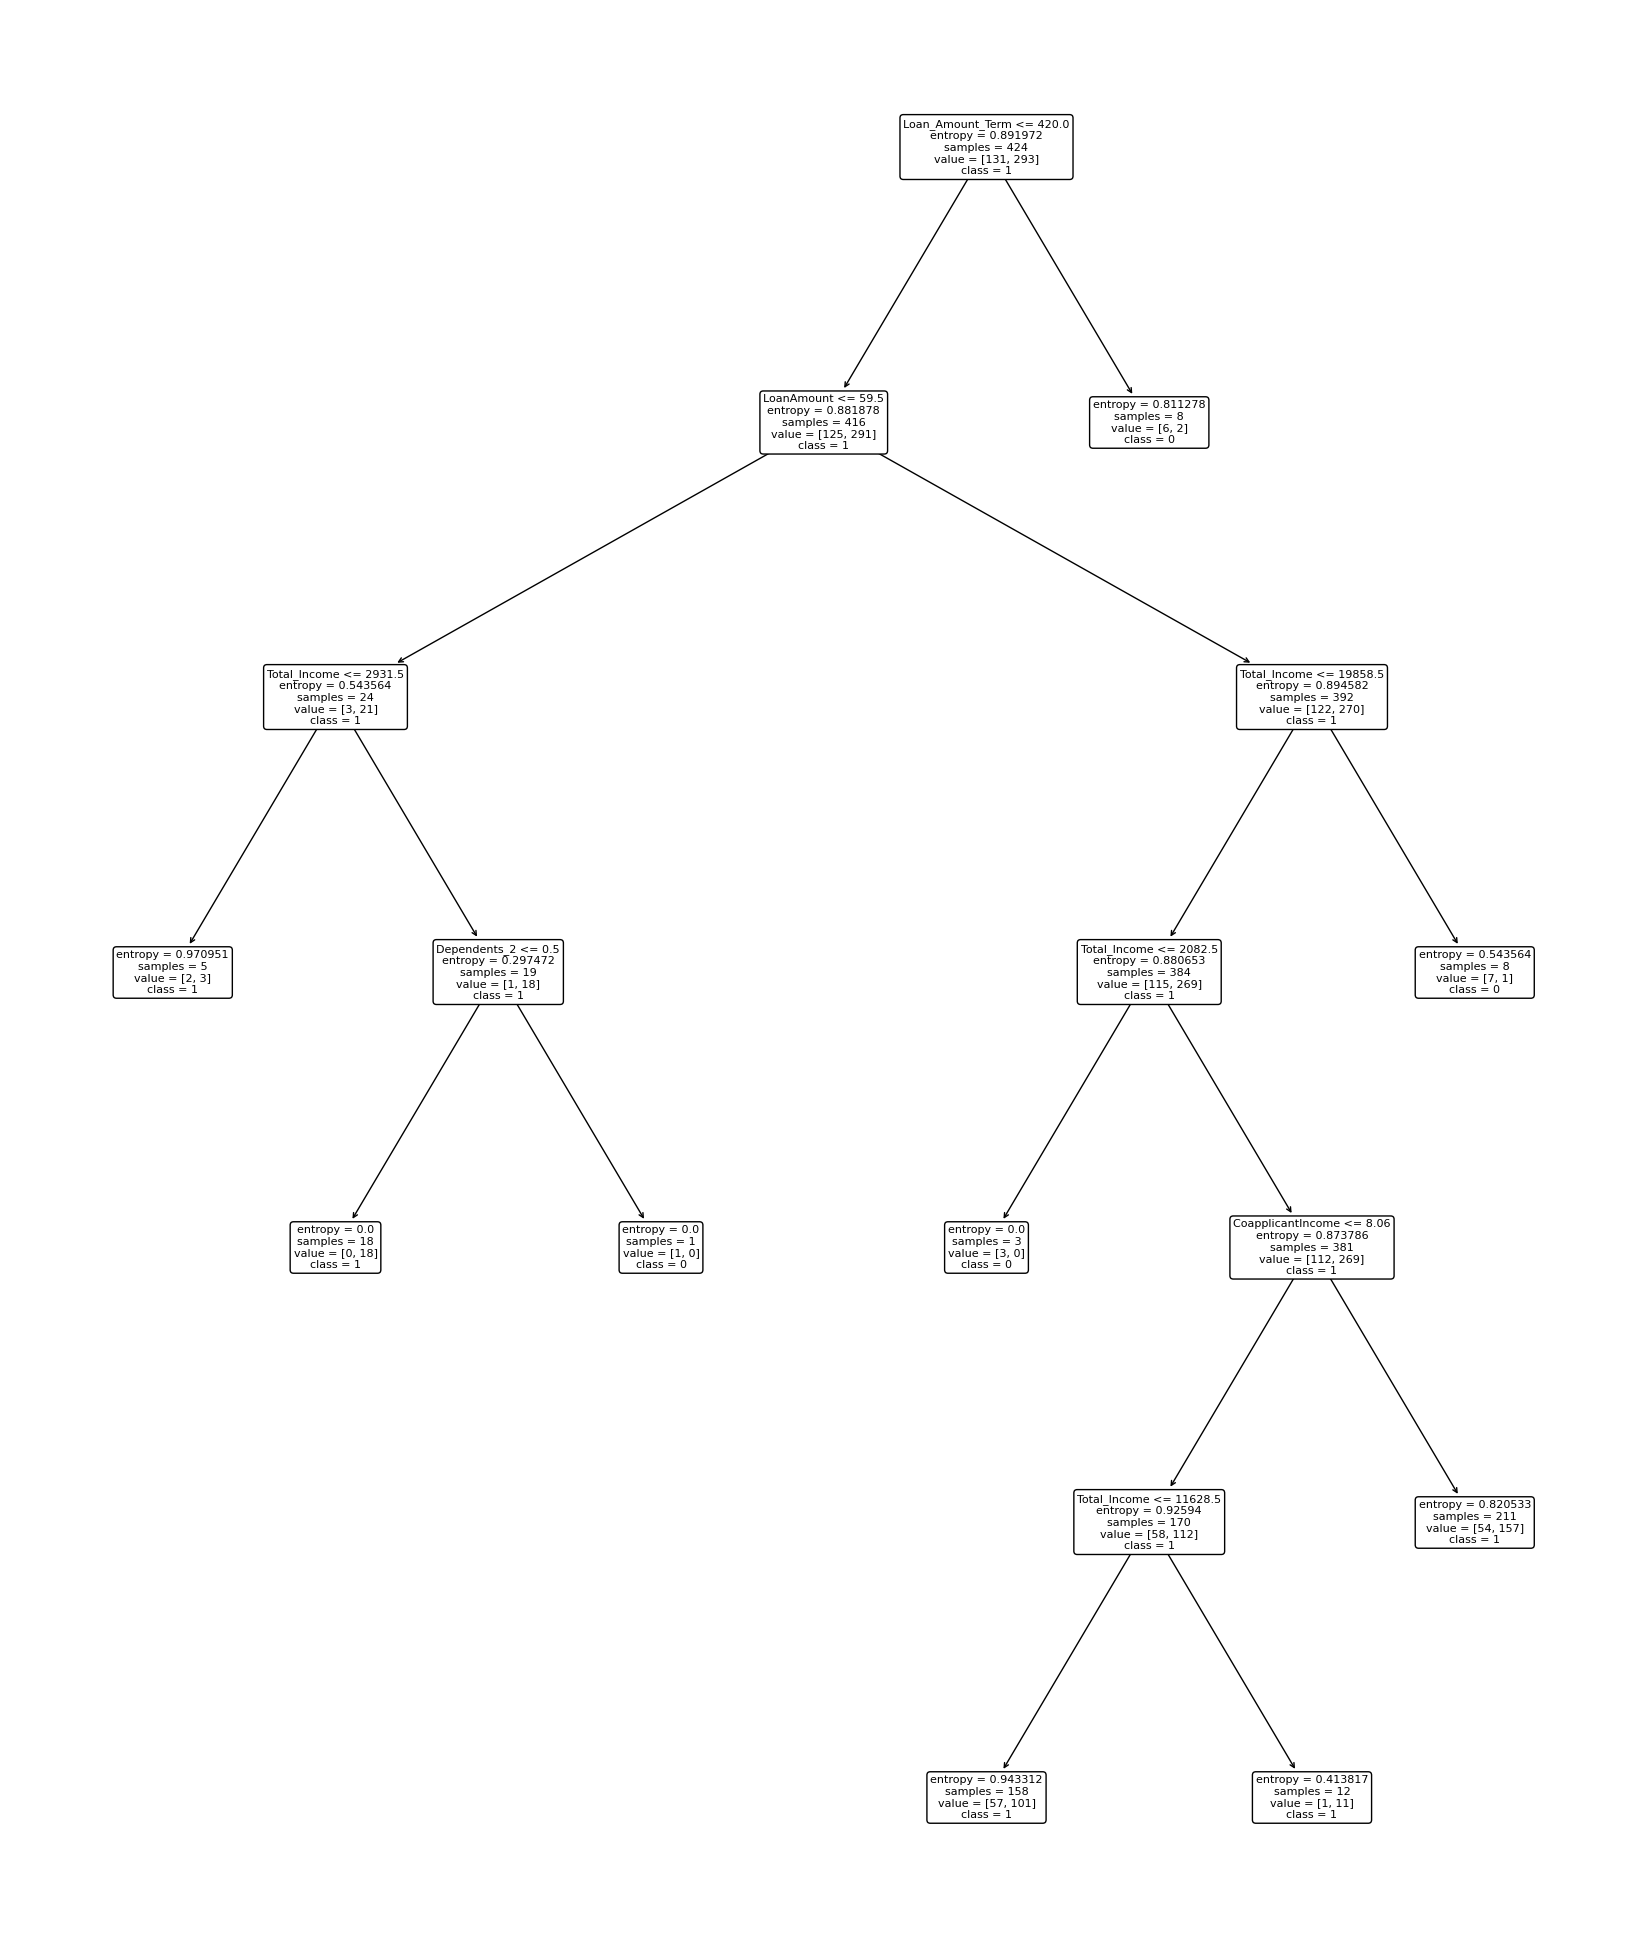

In [62]:
plt.figure(figsize=(21,25))

tree = plot_tree(dtree,
               feature_names=X.columns,
               precision=6,
               class_names=['0','1'], rounded=True,fontsize=8)


In [63]:
print("Precision, Recall, Scores, in testing\n")
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Precision Recall scores
print(classification_report(y_pred, y_test))

mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % mae)

Precision, Recall, Scores, in testing

              precision    recall  f1-score   support

           0       0.08      0.38      0.14        13
           1       0.93      0.68      0.79       169

    accuracy                           0.66       182
   macro avg       0.51      0.53      0.46       182
weighted avg       0.87      0.66      0.74       182

MAE: 0.341
